# Instrucciones

- Some rows contain errors, clean these rows and include them in your analysis.
- Show modeling. 
- Test model’s error using a test set.

Find out ow much the diamonds are worth

Data:

|0|Carat|Cut|Color|Clarity|Depth|Table|x|y|z|coordinates|
|---|---|---|---|---|---|---|---|---|---|---|
|1|0.71|Good|I|VVS2|63.1|58|5.64|5.71|3.58|35.02636, -114.38351|
|2|0.83|Ideal|G|VS1|62.1|55|6.02|6.05|3.75|35.00350, -109.78961|
|3|0.5|Ideal|E|VS2|61.5|55|5.11|5.16|3.16|35.10544, -106.669673|
|4|0.39|Premium|J|VS1|61.6|59|4.67|4.71|2.89|34.94666, -104.64730|
|5|0.32|Premium|G|VS1|62.1|56|4.43|4.4|2.74|35.18864, -101.98602|
|6|0.9|Good|F|SI2|63.3|57|6.08|6.14|3.87|35.26611, -99.63874|
|7|0.51|Ideal|D|VS1|60.9|57|5.2|5.17|3.16|35.51572, -97.67080|
|8|1.12|Ideal|G|VVS2|62.1|54.8|6.64|6.66|4.13|36.163605, -95.75950|
|9|0.4|Ideal|G|VVS2|62.4|56|4.72|4.74|2.95|37.689186, -92.6473|
|10|0.36|Premium|I|VS2|62.7|59|4.54|4.58|2.86|38.66303, -90.21808|


# Codigo

In [96]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r'D:\alex_\Documents\Programacion\Data Analysis\06 - The La pidarist Problem\Data.xlsx')
df_backup = df
df.head()

,0,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,"39.8813889,-83.0930556",326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,"33.415,-111.5488889",326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,"40.1672222,-105.1013889",327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,"37.3711111,-85.5830556",334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,"48.5394444,-121.745",335


In [119]:
df = df_backup

In [120]:
import re

chars_to_remove = ["*", "!", "&", "#", "?", "'", "q."]

pattern = '[' + re.escape(''.join(chars_to_remove)) + ']'

# Reemplazar los caracteres especiales con una cadena vacía
df = df.replace(to_replace=pattern, value='', regex=True)


In [121]:
# Data conversion

# 1. Carat: Valor numerico.
# 2. Cut: Categorias: 'Good', 'Ideal', 'Premium'
print("Cut: ", df["Cut"].unique())
cut_cat = df['Cut'].astype('category')
cut_dict = dict(enumerate(cut_cat.cat.categories))
df['Cut'] = df['Cut'].astype('category').cat.codes

# 3. Color: Categorias: 'I', 'G', 'E', 'J', 'F', 'D'
print("Color: ", df["Color"].unique())
color_cat = df['Color'].astype('category')
color_dict = dict(enumerate(color_cat.cat.categories))
df['Color'] = df['Color'].astype('category').cat.codes

# 4. Clarity: Categorias: 'VVS2', 'VS1', 'VS2', 'SI2'
print("Clarity: ", df["Clarity"].unique())
clarity_cat = df['Clarity'].astype('category')
clarity_dict = dict(enumerate(clarity_cat.cat.categories))
df['Clarity'] = df['Clarity'].astype('category').cat.codes

# 5. Depth: Valor numerico.
# 6. Table: Valor numerico.
# 7. x: Valor numerico.
# 8. y: Valor numerico.
# 9. z: Valor numerico.
# 10. Coordinates: latitud & longitud.

coord_extra = df["coordinates"].str.split(",",expand=True)
coord_extra.columns = ['x_coord', 'y_coord']
df = pd.concat([df, coord_extra], axis=1)
df['x_coord'] = df['x_coord'].astype(float)
df['y_coord'] = df['y_coord'].astype(float)

# 11. price: Valor numerico.

print(df.dtypes)

Cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Color:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
0                int64
Carat          float64
Cut               int8
Color             int8
Clarity           int8
Depth          float64
Table          float64
x              float64
y              float64
z              float64
coordinates     object
price            int64
x_coord        float64
y_coord        float64
dtype: object


### Manejo de NA

In [122]:
# Manejo de NA
print(df.isnull().sum())

0                 0
Carat             0
Cut               0
Color             0
Clarity           0
Depth          2962
Table             0
x              1090
y               585
z                 0
coordinates       0
price             0
x_coord           0
y_coord           0
dtype: int64


Dado que no son pocas las filas con NA, la eliminacion no es adecuada. Por lo que opte por una imputacion por medio de sklearn. 

In [130]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='mean')
# df = df.drop(0, axis = 1)
df.columns = df.columns.astype(str)
df[df.select_dtypes(include=[float, int]).columns] = imputer_num.fit_transform(df.select_dtypes(include=[float, int]))

print(df.isnull().sum())

0              0
Carat          0
Cut            0
Color          0
Clarity        0
Depth          0
Table          0
x              0
y              0
z              0
coordinates    0
price          0
x_coord        0
y_coord        0
dtype: int64


In [128]:
df.columns

Index(['0', 'Carat', 'Cut', 'Color', 'Clarity', 'Depth', 'Table', 'x', 'y',
       'z', 'coordinates', 'price', 'x_coord', 'y_coord'],
      dtype='object')

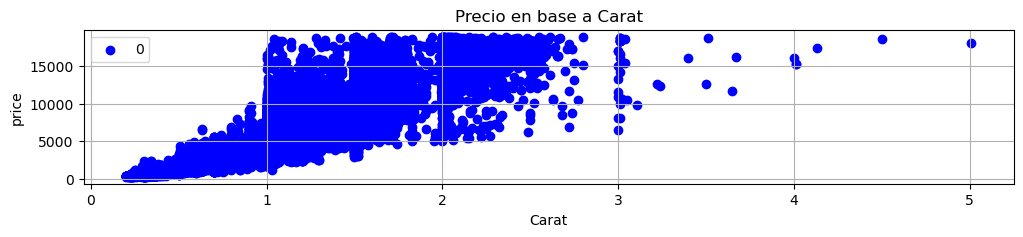

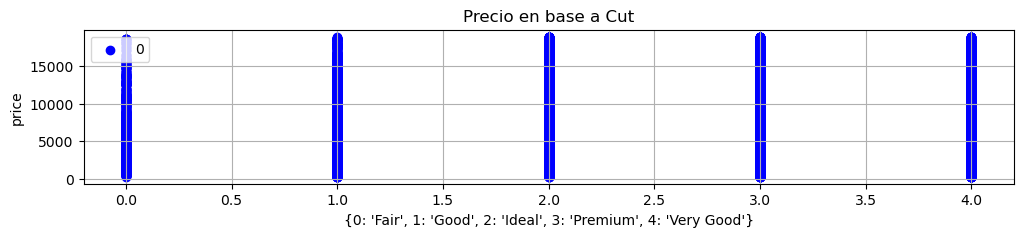

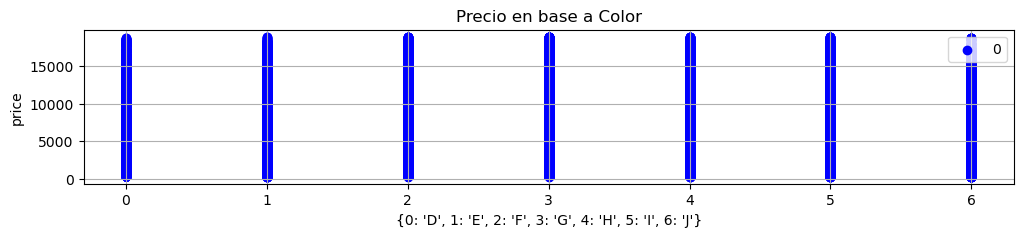

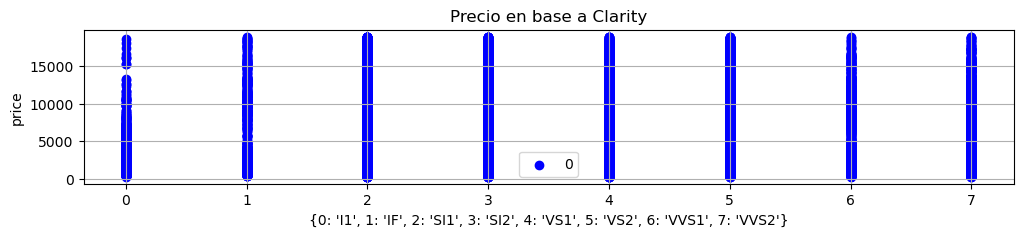

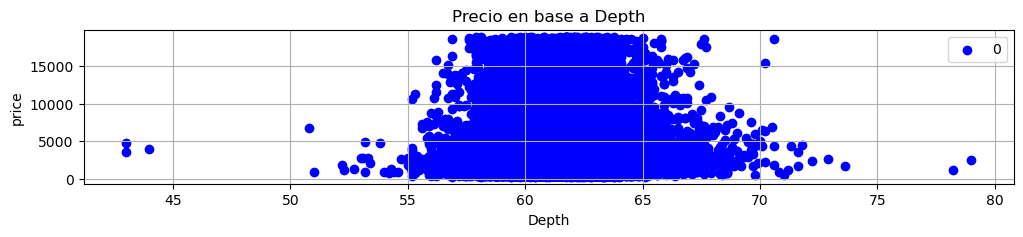

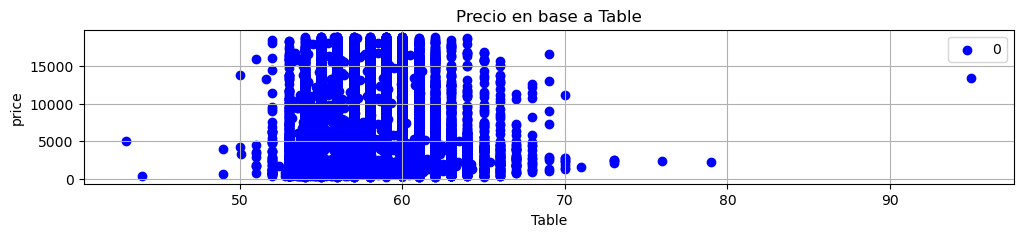

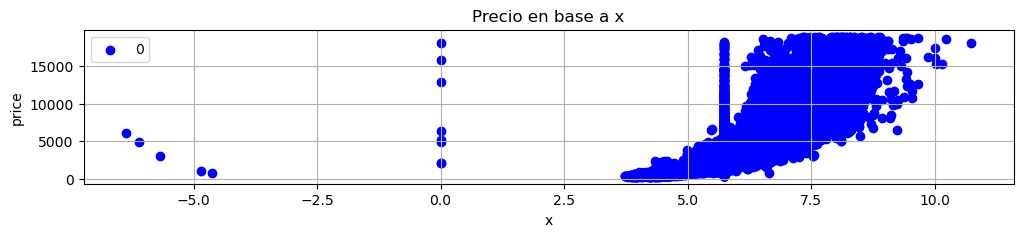

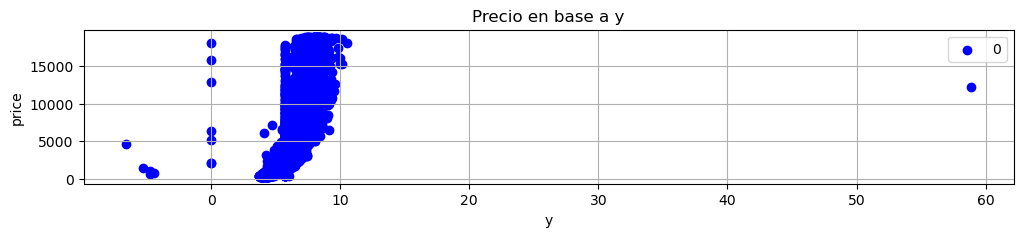

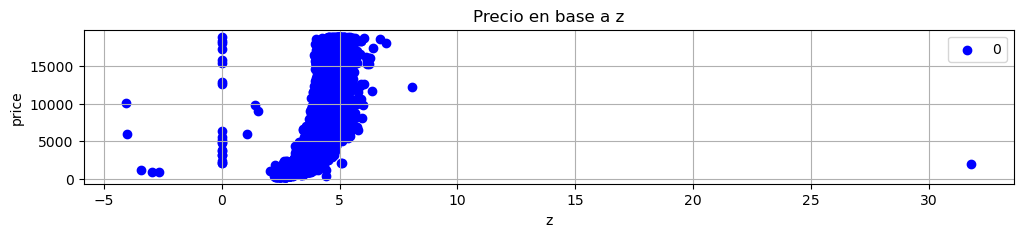

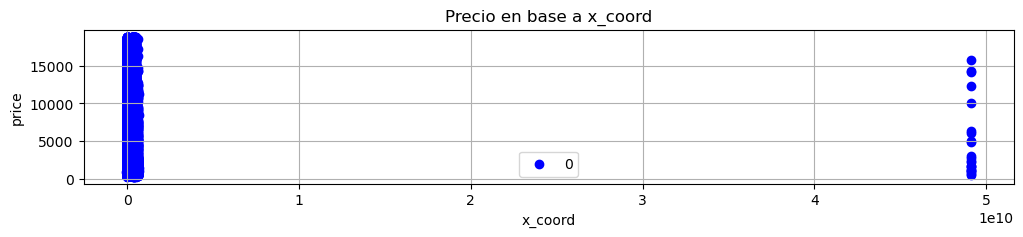

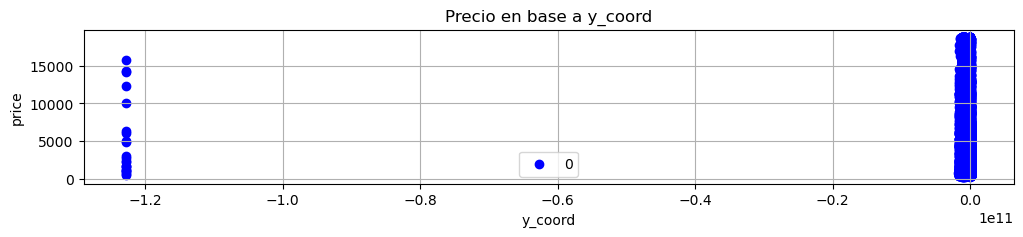

In [135]:
columnas = df.columns.drop(["0", "coordinates", "price"])

for n in columnas:
    variable = df[n]


    plt.figure(figsize=(12, 2))
    plt.scatter(variable, df['price'], color='blue', label='Datos')
    plt.title(f'Precio en base a {variable.name}')

    try:
        plt.xlabel(eval((str(variable.name) + "_dict").lower()))
    except NameError:
        plt.xlabel(variable.name)

    plt.ylabel('price')
    plt.legend(cut_dict)
    plt.grid(True)
    plt.show()

# Analisis de Gráficas:

A primera vista se puede determinar que las variables con mayor correacion entre el precio son el carat o quilate (medida que sirve para cuantificar la masa y grado de pureza) y "x".

Se realizaran dos modelos uno utilizando la totalidad de las variables y uno exclusivamnete con estas 2 ultimas variables.

Se escogio el modelo Random Forest por las siguientes razones:
- La no linealidad de los datos. 
- La necesidad de un minimo procesamiento de los datos, como el manejo de la normalizacion y colinealidad. 

Estas razones ponen al modelo por encima de otros, como la regresion por la no relacion lineal entre caracteristicas y la variable objeto; el modelo por regresion de vectores de soporte por requerir un alto ajuste de variables y regularizacion de las mismas; y redes neuronales que requieren una gran cantidad de memoria. 

## Primer modelo: Todas las variables

In [138]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dividir df entre training y test
X = df.drop(['price', "0","coordinates"], axis=1)
print("X shape: ", X.shape)
y = df['price']
print("y shape: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) 
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

# RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)


X shape:  (53929, 11)
y shape:  (53929,)
X_train shape:  (43143, 11)
X_test shape:  (10786, 11)
y_train shape:  (43143,)
y_test shape:  (10786,)
MAE:  274.9406112089746
MSE:  294112.62685725675
RMSE:  542.3215161297371


## SEgundo modelo: solo variables "x", "y", "z"

In [140]:
# Dividir df entre training y test
X2 = df[["Carat", "x"]]
print("X shape: ", X2.shape)
y2 = df['price']
print("y shape: ", y2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=10) 
print("X_train shape: ", X_train2.shape)
print("X_test shape: ", X_test2.shape)
print("y_train shape: ", y_train2.shape)
print("y_test shape: ", y_test2.shape)

# RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)
model2.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = model2.predict(X_test2)

# Evaluate the model
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)

print("MAE: ", mae2)
print("MSE: ", mse2)
print("RMSE: ", rmse2)


X shape:  (53929, 2)
y shape:  (53929,)
X_train shape:  (43143, 2)
X_test shape:  (10786, 2)
y_train shape:  (43143,)
y_test shape:  (10786,)
MAE:  845.691357507707
MSE:  2255702.3703734195
RMSE:  1501.899587313819



### Evaluacion del **modelo 1** por Random Forest:
1. Mean Absolute Error (MAE): 274.94
2. Mean Squared Error (MSE): 294112.62
3. Root Mean Squared Error (RMSE): 542.32

### Interpretacion
1. MAE: en promedio, las predicciones del modelo tienen una desviacion de $247.94. 
2. MSE: El promedio del cuadrado de las diferencias entre los valores predichos y los reales es $294,112.62. 
3. RMSE: Tomando la raíz cuadrada de MSE, el error promedio es de aproximadamente $542.32. 


### Evaluacion del **modelo 2** por Random Forest:
1. Mean Absolute Error (MAE): 845.69
2. Mean Squared Error (MSE): 2255702.37
3. Root Mean Squared Error (RMSE): 1501.89

## Interpretacion
1. MAE: en promedio, las predicciones del modelo tienen una desviacion de $845.69. 
2. MSE: El promedio del cuadrado de las diferencias entre los valores predichos y los reales es 2,255,702.37. 
3. RMSE: Tomando la raíz cuadrada de MSE, el error promedio es de aproximadamente $1,501.89. 

## Conclusion
Comparando el resultado de las metricas de error de ambos modelos, el primero tiene un mejor ajuste a los datos y por consecuencia una mejor prediccion.
Al ser menor la MAE del primer modelo, nos indica una desviación promedio menor, el menor MSE tambien sugiere que los errores al cuadrado son considerablemente menores, misma historica sucede con el RMSE.


## Prediccion de los diamantes de Krenk

In [141]:
df_predict = pd.read_excel(r'D:\alex_\Documents\Programacion\Data Analysis\06 - The La pidarist Problem\Data_Predict.xlsx')
df_predict_backup = df_predict
df_predict.head()

,0,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates
0,1,0.71,Good,I,VVS2,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351"
1,2,0.83,Ideal,G,VS1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961"
2,3,0.50,Ideal,E,VS2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673"
3,4,0.39,Premium,J,VS1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730"
4,5,0.32,Premium,G,VS1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602"


In [142]:
# Data conversion

# 1. Carat: Valor numerico.
# 2. Cut: Categorias: 'Good', 'Ideal', 'Premium'
print("Cut: ", df_predict["Cut"].unique())
df_predict['Cut'] = df_predict['Cut'].astype('category').cat.codes

# 3. Color: Categorias: 'I', 'G', 'E', 'J', 'F', 'D'
print("Color: ", df_predict["Color"].unique())
df_predict['Color'] = df_predict['Color'].astype('category').cat.codes

# 4. Clarity: Categorias: 'VVS2', 'VS1', 'VS2', 'SI2'
print("Clarity: ", df_predict["Clarity"].unique())
df_predict['Clarity'] = df_predict['Clarity'].astype('category').cat.codes

# 5. Depth: Valor numerico.
# 6. Table: Valor numerico.
# 7. x: Valor numerico.
# 8. y: Valor numerico.
# 9. z: Valor numerico.
# 10. Coordinates: latitud & longitud.

coord_extra = df_predict["coordinates"].str.split(",",expand=True)
coord_extra.columns = ['x_coord', 'y_coord']
df_predict = pd.concat([df_predict, coord_extra], axis=1)
df_predict['x_coord'] = df_predict['x_coord'].astype(float)
df_predict['y_coord'] = df_predict['y_coord'].astype(float)

# 11. price: Valor numerico.

print(df_predict.dtypes)

Cut:  ['Good' 'Ideal' 'Premium']
Color:  ['I' 'G' 'E' 'J' 'F' 'D']
Clarity:  ['VVS2' 'VS1' 'VS2' 'SI2']
0                int64
Carat          float64
Cut               int8
Color             int8
Clarity           int8
Depth          float64
Table          float64
x              float64
y              float64
z              float64
coordinates     object
x_coord        float64
y_coord        float64
dtype: object


In [143]:
df_predict.columns

Index([            0,       'Carat',         'Cut',       'Color',
           'Clarity',       'Depth',       'Table',           'x',
                 'y',           'z', 'coordinates',     'x_coord',
           'y_coord'],
      dtype='object')

In [144]:
krenk_data = df_predict.drop([0,"coordinates"], axis=1)

# Predict on the test set
prediccion_precio = model.predict(krenk_data)

df_predict["PrediccionPrecio"] = prediccion_precio

## Precio Predicho:

In [145]:
df_predict

,0,Carat,Cut,Color,Clarity,Depth,Table,x,y,z,coordinates,x_coord,y_coord,PrediccionPrecio
0,1,0.71,0,4,3,63.1,58.0,5.64,5.71,3.58,"35.02636, -114.38351",35.026360,-114.383510,2072.19
1,2,0.83,1,3,1,62.1,55.0,6.02,6.05,3.75,"35.00350, -109.78961",35.003500,-109.789610,5238.15
2,3,0.50,1,1,2,61.5,55.0,5.11,5.16,3.16,"35.10544, -106.669673",35.105440,-106.669673,1476.63
3,4,0.39,2,5,1,61.6,59.0,4.67,4.71,2.89,"34.94666, -104.64730",34.946660,-104.647300,920.65
4,5,0.32,2,3,1,62.1,56.0,4.43,4.40,2.74,"35.18864, -101.98602",35.188640,-101.986020,992.76
5,6,0.90,0,2,0,63.3,57.0,6.08,6.14,3.87,"35.26611, -99.63874",35.266110,-99.638740,2327.86
6,7,0.51,1,0,1,60.9,57.0,5.20,5.17,3.16,"35.51572, -97.67080",35.515720,-97.670800,3352.99
7,8,1.12,1,3,3,62.1,54.8,6.64,6.66,4.13,"36.163605, -95.75950",36.163605,-95.759500,4785.24
8,9,0.40,1,3,3,62.4,56.0,4.72,4.74,2.95,"37.689186, -92.6473",37.689186,-92.647300,666.18
9,10,0.36,2,4,2,62.7,59.0,4.54,4.58,2.86,"38.66303, -90.21808",38.663030,-90.218080,573.73
